# Mouvement brownien

Premièrement théorisé par Einstein en 1905, le mouvement brownien est le mouvement aléatoire de particules microscopiques en suspension dans un fluide (liquide ou gaz). Causé par les collisions incessantes entre les particules en suspension et les molécules du fluide environnant, ce phénomène a été pour la première fois décrit mathématique par Langevin en 1908. On se propose ici, à travers diverses simulations numériques, d'illustrer ce phénomène physique fondamental.

## Equation de Langevin
L'équation de Langevin décrit le mouvement d'une particule soumise à des forces aléatoires. Elle s'écrit sous la forme suivante :
$$m \frac{d^2 x(t)}{dt^2} = -\gamma \frac{dx(t)}{dt} + f(x) + \eta(t)$$
où :
- $m$ est la masse de la particule _(en kg)_
- $\gamma$ est le coefficient de friction _(en kg/s)_
- $f(x)$ est une force externe appliquée à la particule (et ne dépendant pas du temps) _(en N)_
- $\eta(t)$ est une force aléatoire représentant les collisions entre particules, dont l'intensité dependant essentiellement de la température. _(en N)_

## Cas de sur-amortissement

Prenons premièrement le cas de sur-amortissement, où l'on peut négliger le terme d'inertie. L'équation de Langevin se simplifie alors en :
$$\gamma \frac{dx(t)}{dt} = f(x) + \eta(t)$$

On peut également la réécrire sous la forme d'une équation différentielle stochastique (EDS) :
$$dx(t) = \frac{f(x)}{\gamma} dt + \sqrt{2Ddt} R(t)$$
avec $D$ le coefficient de diffusion _en m²/s_, et $R(t)$ un bruit blanc gaussien de moyenne nulle et de variance unitaire.



### Cas sans force extérieure
Commençons par simuler le cas où il n'y a pas de force extérieure, c'est à dire $f(x) = 0$. Prenons comme premier exemple le cas où $D=1$ et $\gamma=1$. Nous allons simuler la trajectoire d'une particule soumise à ce mouvement brownien sur une durée de 1000 secondes, avec un pas de temps de 0.1 seconde.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from free_particle import euler_maruyama

# Paramètres de la simulation
step = 10000 # Nombre de pas de temps
dt = 0.01 # Pas de temps
gamma = 1.0 # Coefficient de friction
D = 1.0 # Coefficient de diffusion
x0 = 0.0 # Position initiale

# Simulation du mouvement brownien
T = step*dt # Temps total de simulation
x = euler_maruyama(D, gamma, T, dt)
t = np.arange(0, T, dt)

# Simulation de plusieurs random-walk pour faire la moyenne sur plein
n_walks = 1_000
x_0 = np.zeros((n_walks,))
x_walks = euler_maruyama(D, gamma, T, dt, x0=x_0)

In [4]:
nb = 5000
print(f"Moyenne sur {n_walks} random-walks : {x_walks[nb].mean()}")
print(f"Variance sur {n_walks} random-walks : {x_walks[nb].var()}")

Moyenne sur 1000 random-walks : -0.060356936051667615
Variance sur 1000 random-walks : 101.62023815096987


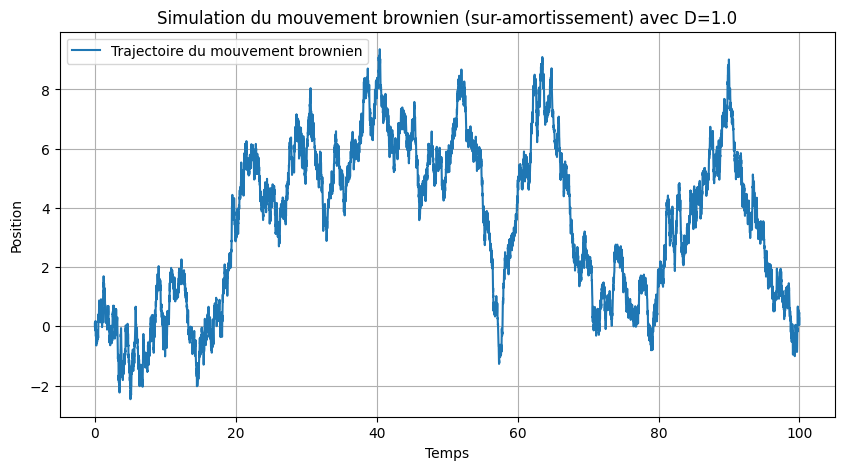

In [5]:
# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Trajectoire du mouvement brownien')
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) avec D={}'.format(D))
plt.legend()
plt.grid()
plt.show()

In [ ]:
import ipywidgets as widgets

def show_stats(nb):
    plt.figure(figsize=(8, 4))
    plt.hist(x_walks[nb], bins=80, density=True)
    plt.xlabel("Position")
    plt.ylabel("Densite de probabilite")
    plt.title("Distribution des positions sur {} random-walks".format(n_walks))
    plt.show()

nb_slider = widgets.IntSlider(
    value=5000,
    min=0,
    max=x_walks.shape[0] - 1,
    step=1,
    description="nb",
)

widgets.interact(show_stats, nb=nb_slider)

interactive(children=(IntSlider(value=5000, description='nb', max=9999), Output()), _dom_classes=('widget-inte…

<function __main__.show_stats(nb)>

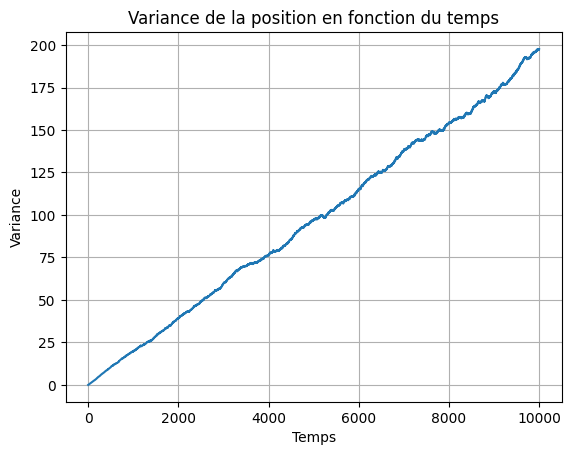

In [4]:
vars = x_walks.var(axis=1)
plt.plot(vars)
plt.xlabel("Temps")
plt.ylabel("Variance")
plt.title("Variance de la position en fonction du temps")
plt.grid()
plt.show()

### Influence du coefficient D

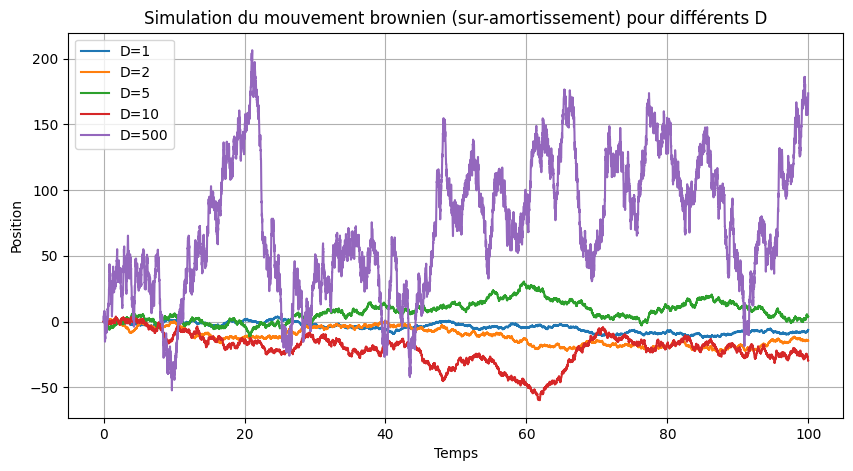

In [7]:
# Avec différents D

D = [1,2,5,10,500]
x = np.zeros((len(D), step))
for i, d in enumerate(D):
    x[i] = euler_maruyama(d, gamma, T, dt)[:, 0]

# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
for i, d in enumerate(D):
    plt.plot(t, x[i], label='D={}'.format(d))
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) pour différents D')
plt.legend()
plt.grid()
plt.show()

On constate que l'augmentation de D rend la trajectoire beaucoup plus étendue confirmant notre intuition que D est un coefficient de diffusion. En effet, plus D est grand, plus la particule subit des forces aléatoires importantes, ce qui se traduit par une trajectoire plus erratique et "de grande variance".

### Ajout d'une force extérieure
Ajoutons maintenant une force extérieure dérivant d'un potentiel qu'on choisira comme harmonique. Le potentiel harmonique est défini par :
$$V(x) = \frac{1}{2} k x^2$$
où $k$ est la constante de raideur du potentiel. La force correspondante est donnée par :
$$f(x) = -\frac{dV}{dx} = -kx$$



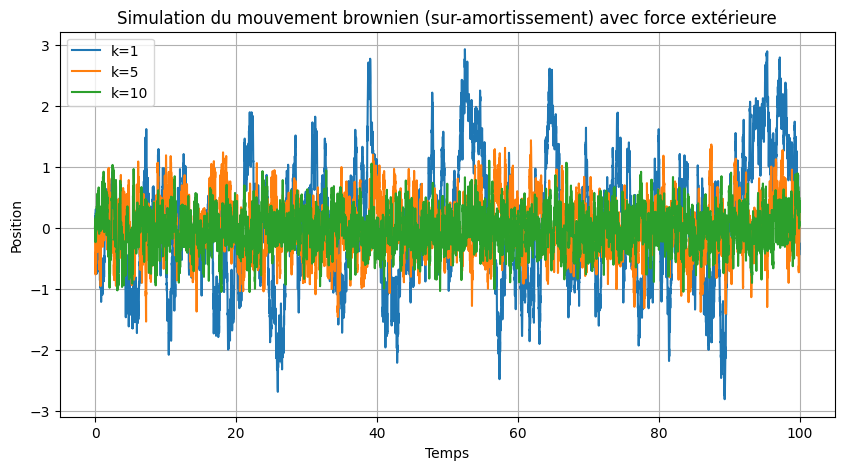

In [7]:
## Paramètres changés pour cette résolution
n_walks = 1000
k_liste = [1, 5, 10]
D = 1.0 # Coefficient de diffusion
y = np.zeros((len(k_liste), step, n_walks,))
x_0 = np.zeros((n_walks,))

# Simulation du mouvement brownien avec force extérieure
for i, k in enumerate(k_liste):
    y[i] = euler_maruyama(D, gamma, T, dt, f=lambda x: -k*x, x0=x_0)


walk_nb = 500
# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
for i, k in enumerate(k_liste):
    plt.plot(t, y[i, :, walk_nb], label='k={}'.format(k))

plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) avec force extérieure')
plt.legend()
plt.grid()
plt.show()


In [11]:
def show_stats(nb, k=0):
    plt.figure(figsize=(8, 4))
    plt.hist(y[k, nb], bins=80, density=True)
    plt.xlabel("Position")
    plt.ylabel("Densite de probabilite")
    plt.title("Distribution des positions sur {} random-walks".format(n_walks))
    plt.show()

nb_slider = widgets.IntSlider(
    value=5000,
    min=0,
    max=y.shape[1] - 1,
    step=1,
    description="nb",
)

widgets.interact(show_stats, nb=nb_slider, k=widgets.IntSlider(value=0, min=0, max=len(k_liste)-1, step=1, description="k"))

interactive(children=(IntSlider(value=5000, description='nb', max=9999), IntSlider(value=0, description='k', m…

<function __main__.show_stats(nb, k=0)>

In [14]:
vars.shape

(3, 10000)

/tmp/ipykernel_37150/869081477.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


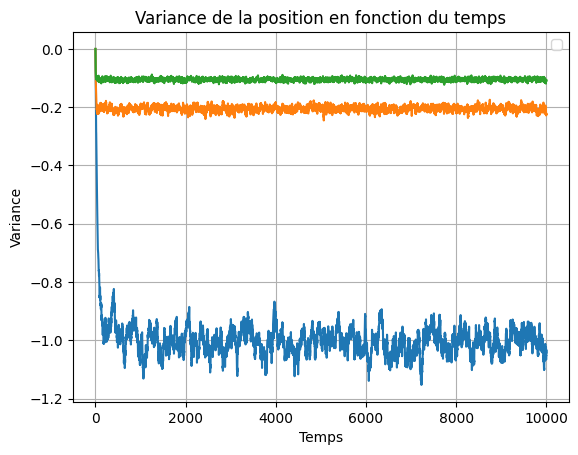

In [22]:
vars = y.var(axis=2).T
plt.plot(vars*-1)
plt.xlabel("Temps")
plt.ylabel("Variance")
plt.title("Variance de la position en fonction du temps")
plt.grid()
plt.legend()
plt.show()

In [17]:
from scipy.optimize import curve_fit

A=-0.9622568663806665, tau=0.5465912799027518, b=-0.04192253927710662


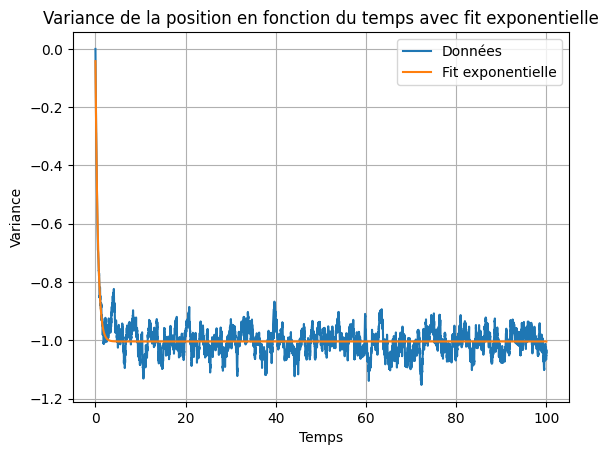

In [23]:
def exp_law(x, A, tau, b):
    return A * (1 - np.exp(-x/tau)) + b
data = vars[:, 0]*-1
popt, pcov = curve_fit(exp_law, t, data)
A, tau, b = popt
print(f"A={A}, tau={tau}, b={b}")
plt.plot(t, data, label="Données")
plt.plot(t, exp_law(t, *popt), label="Fit exponentielle")
plt.xlabel("Temps")
plt.ylabel("Variance")
plt.title("Variance de la position en fonction du temps avec fit exponentielle")
plt.legend()
plt.grid()
plt.show()